Построим графики зависимости времени работы, ускорения и эффективности от числа потоков. Для этого запустим программу несколько раз при фиксированном числе частиц $N=50000$ на различном числе потоков $P$. Точки $a=0, b=100, x=50$ во всех опытах. Вероятность $p=0.5$ так же во всех опытах. Запишем все собранные данные в файл stats.txt и считаем его.

In [78]:
import matplotlib.pyplot as plt
import numpy as np

fp = open("stats.txt", "r")
P_values = [1, 2, 3, 4, 6, 8, 16]
T_values = [] #work time on P threads
S_values = [] #acceleration
E_values = [] #efficiency
for i in range(0, 7):
    line = fp.readline()
    line_stats = line.split(' ')
    T_values.append(float(line_stats[1])) 
    S_values.append(T_values[0] / T_values[i]) 
    E_values.append(S_values[i] / P_values[i])

Построим график зависимости времени работы программы от числа потоков $T(P)$

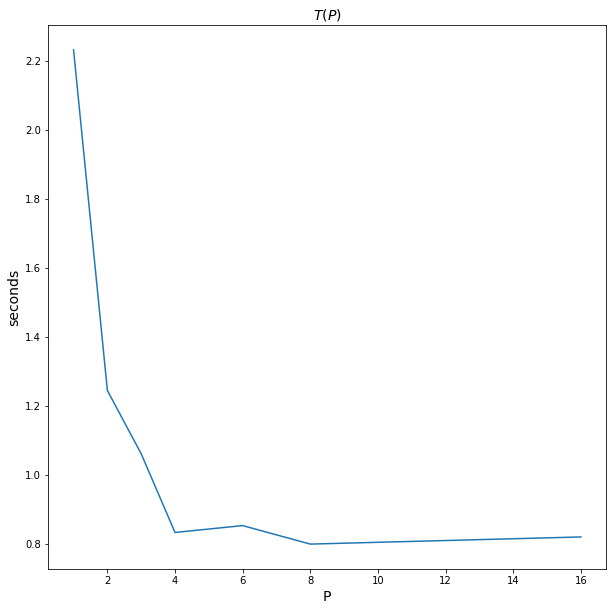

In [65]:
plt.figure(figsize = (10, 10))
plt.plot(P_values, T_values)
plt.title('$T(P)$', fontsize = 14)
plt.xlabel('P', fontsize = 14)
plt.ylabel('seconds', fontsize = 14)
plt.show()

Наблюдается ускорение работы программы до 8 потоков, далее оно почти не изменяется.

Построим график зависимости ускорения от числа потоков $S(P)=\frac{T_{1}}{T_{P}}$

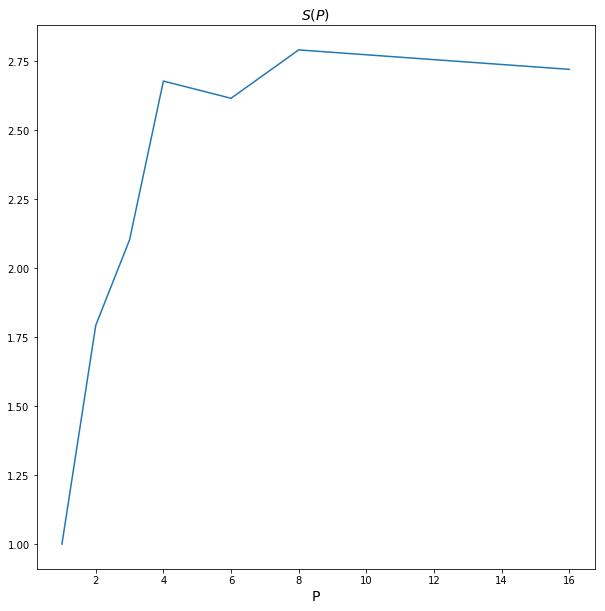

In [66]:
plt.figure(figsize = (10, 10))
plt.plot(P_values, S_values)
plt.title('$S(P)$', fontsize = 14)
plt.xlabel('P', fontsize = 14)
plt.show()

Вследсвие того, что на 8 потоках программа отработала быстрее всего, пик ускорения оказался на 8 потоках.

Построим график зависимости эффективности от числа потоков $E(P)=\frac{S_P}{P}$

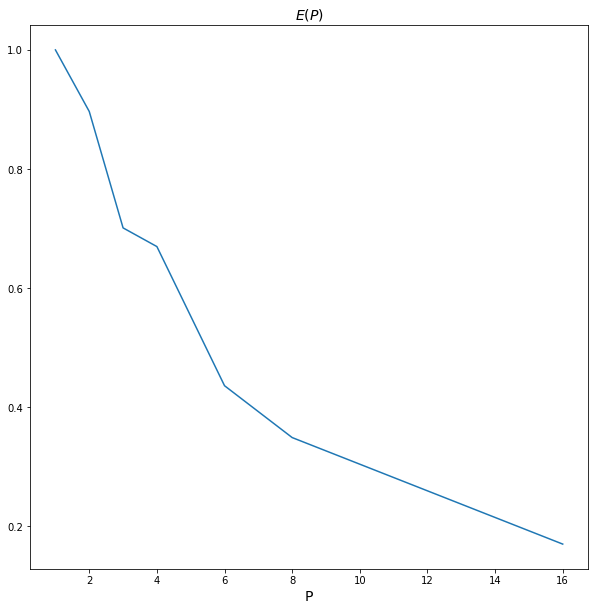

In [67]:
plt.figure(figsize = (10, 10))
plt.plot(P_values, E_values)
plt.title('$E(P)$', fontsize = 14)
plt.xlabel('P', fontsize = 14)
plt.show()

Эффективности $>1$ добиться не удалось. Это значит, что ускорение программы было меньше, чем в $P$ раз для любого числа потоков.

Теперь исследуем как ведут себя время работы, ускорение и эффективность при фиксированном числе потоков $P$, но на различном числе частиц $N$. Запустим несколько раз программу на $4$ потоках и при разном числе частиц. Параметры $a,b,x,p$ неизменны. Полученные данные запишем в файл stats2.txt и считаем тут.

In [105]:
fp2 = open("stats2.txt", "r")
N_values = [1000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
Tn_values = [] #work time on 4 threads
T1_values = [] #work time on 1 thread
Sn_values = []
En_values = []

for i in range(0, 11):
        line = fp2.readline() #one line for 4 threads and N particles
        line_stats = line.split(' ')
        Tn_values.append(float(line_stats[1])) 
        line = fp2.readline()#the next line for 1 thread and N particles
        line_stats = line.split(' ')
        T1_values.append(float(line_stats[1]))
        Sn_values.append(T1_values[i] / Tn_values[i])
        En_values.append(Sn_values[i] / 4)

Построим график зависимости времени работы от числа частиц $T(N)$

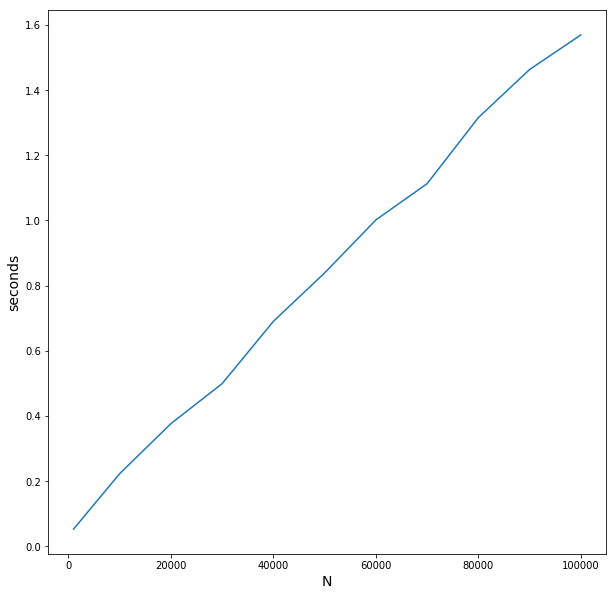

In [106]:
plt.figure(figsize = (10, 10))
plt.plot(N_values, Tn_values)
plt.xlabel('N', fontsize = 14)
plt.ylabel('seconds', fontsize = 14)
plt.show()

Время работы программы почти линейно увеличивается с ростом числа частиц.

Построим график зависимости ускорения от числа частиц $S(N)=\frac{T_1}{T_P}$

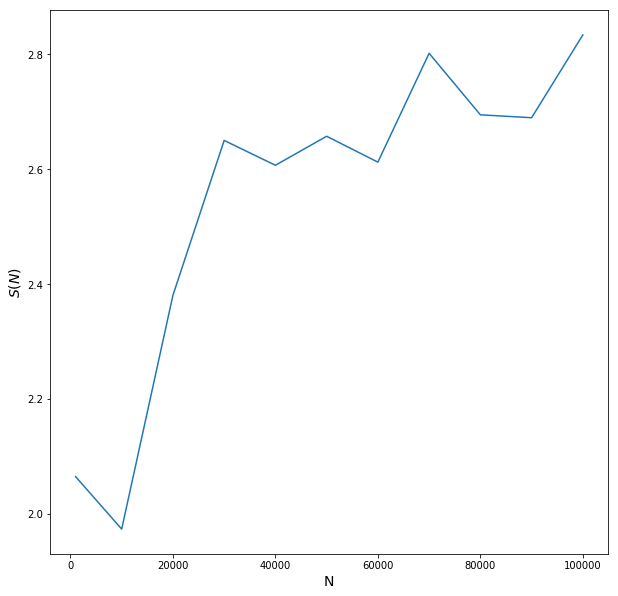

In [107]:
plt.figure(figsize = (10, 10))
plt.plot(N_values, Sn_values)
plt.xlabel('N', fontsize = 14)
plt.ylabel('$S(N)$', fontsize = 14)
plt.show()

Получается, что при достаточно большом числе частиц ускорение оказывается $2.6-2.8$ раз.

Построим график зависимости эффективности от числа частиц $E(N)=\frac{S_P}{P}$.

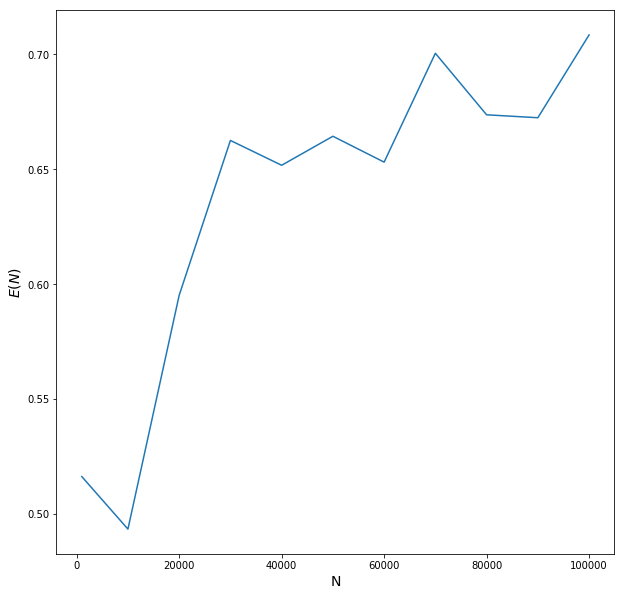

In [108]:
plt.figure(figsize = (10, 10))
plt.plot(N_values, En_values)
plt.xlabel('N', fontsize = 14)
plt.ylabel('$E(N)$', fontsize = 14)
plt.show()

Эффективность возрастает при увеличении числа частиц.